##Introduction of the Dataset
####The Obesity Classification Dataset is a dataset commonly used in machine learning for classification tasks, particularly in the domain of healthcare and medical research. This dataset typically contains various features related to individuals' lifestyles, eating habits, physical activity levels, and health indicators, such as: Age, Gender, Weight, BMI and Lable(Obesity Level)

###This dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data. The dataset includes the following columns:

* ID: A unique identifier for each individual
* Age: The age of the individual
* Gender: The gender of the individual
* Height: The height of the individual in centimeters
* Weight: The weight of the individual in kilograms
* BMI: The body mass index of the individual, calculated as weight divided by height squared
* Label: The obesity classification of the individual, which can be one of the following:
- Normal Weight
- Overweight
- Obese
- Underweight

##Source

https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset

##Importing Necessary Libraries

In [1]:
import pandas as pd #Pandas is a powerful library for data manipulation and analysis.
import numpy as np #NumPy is a powerful tool for numerical computations in Python.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import sklearn as dataset #sklearn library, which provides tools for data preprocessing, model building, and evaluation in machine learning.
from sklearn.model_selection import train_test_split #Import function to split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier #Import the decision tree classifier for building the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  #Import metrics for evaluating model performance

##Loading the Dataset

In [2]:
df= pd.read_csv("Obesity Classifications.csv") #Loading the dataset.

##Analyze the dataset

In [3]:
df.head() #Displays the first 5 rows of the dataset.

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


##Exploring the Data:
###Understanding the dataset by exploring its structure and contents.

In [4]:
df.columns #Displays the names of the columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [5]:
df.shape # Displays the total count of the Rows and Columns respectively.

(108, 7)

In [6]:
df.info() #Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


##Data Cleaning:
###Checking for missing values, duplicates, or any inconsistencies and clean the data accordingly.

In [7]:
df.isnull().sum() #Checking for any null data.

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

###There is no null/empty data in the dataset

In [8]:
df.duplicated().sum()  #Checking for any Duplicate Data

0

###There is no duplicate value in the dataset

In [9]:
df.describe(include="all")

,ID,Age,Gender,Height,Weight,BMI,Label
count,108.000000,108.000000,108,108.000000,108.000000,108.000000,108
unique,NaN,NaN,2,NaN,NaN,NaN,4
top,NaN,NaN,Male,NaN,NaN,NaN,Underweight
freq,NaN,NaN,56,NaN,NaN,NaN,47
mean,56.046296,46.555556,NaN,166.574074,59.490741,20.549074,NaN
std,31.917939,24.720620,NaN,27.873615,28.856233,7.583818,NaN
min,1.000000,11.000000,NaN,120.000000,10.000000,3.900000,NaN
25%,28.750000,27.000000,NaN,140.000000,35.000000,16.700000,NaN
50%,56.500000,42.500000,NaN,175.000000,55.000000,21.200000,NaN
75%,83.250000,59.250000,NaN,190.000000,85.000000,26.100000,NaN


In [10]:
df.drop(columns=['ID'], inplace=True) #Drop the 'ID' column, as it is not useful

In [11]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


<ipython-input-12-2102ebe1f741>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='Label', inner='stick', palette='Dark2')


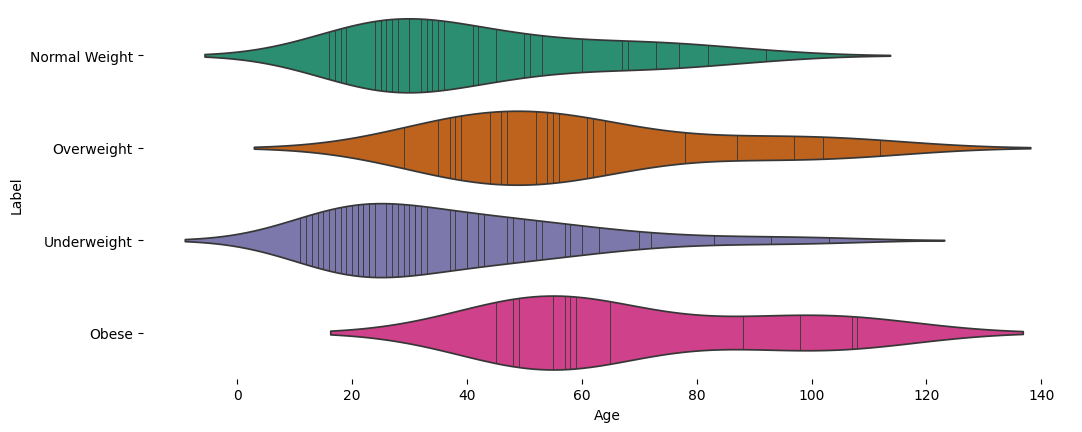

In [12]:
# @title Label vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

###Decision tree algorithms typically require these categorical variables to be encoded into numerical representations before they can be used in the model.
Label encoding for the 'Gender' column and 'Label' column

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'Gender' column
gender_encoder = LabelEncoder()
df['Gender_encoded'] = gender_encoder.fit_transform(df['Gender'])

# Label encoding for the 'Label' column
label_encoder = LabelEncoder()
df['Label_encoded'] = label_encoder.fit_transform(df['Label'])

In [14]:
df.head()

,Age,Gender,Height,Weight,BMI,Label,Gender_encoded,Label_encoded
0,25,Male,175,80,25.3,Normal Weight,1,0
1,30,Female,160,60,22.5,Normal Weight,0,0
2,35,Male,180,90,27.3,Overweight,1,2
3,40,Female,150,50,20.0,Underweight,0,3
4,45,Male,190,100,31.2,Obese,1,1


In [15]:
# Drop the 'Gender and label' column as we do not need the categorical values
df.drop(columns=['Gender','Label'], inplace=True)
df.head()

,Age,Height,Weight,BMI,Gender_encoded,Label_encoded
0,25,175,80,25.3,1,0
1,30,160,60,22.5,0,0
2,35,180,90,27.3,1,2
3,40,150,50,20.0,0,3
4,45,190,100,31.2,1,1


In [16]:
df.iloc[:, 0:4]  # Select all rows and the first four columns from the DataFrame


,Age,Height,Weight,BMI
0,25,175,80,25.3
1,30,160,60,22.5
2,35,180,90,27.3
3,40,150,50,20.0
4,45,190,100,31.2
...,...,...,...,...
103,11,175,10,3.9
104,16,160,10,3.9
105,21,180,15,5.6
106,26,150,15,5.6


In [17]:
x = df.iloc[:,0:6] #This selects all rows and the first six columns from the DataFrame df.
y = df.iloc[:,5] #This selects all rows and the 6th column (index 5) from the DataFrame df.

In [18]:
x #The resulting DataFrame x contains the features for the model.

,Age,Height,Weight,BMI,Gender_encoded,Label_encoded
0,25,175,80,25.3,1,0
1,30,160,60,22.5,0,0
2,35,180,90,27.3,1,2
3,40,150,50,20.0,0,3
4,45,190,100,31.2,1,1
...,...,...,...,...,...,...
103,11,175,10,3.9,1,3
104,16,160,10,3.9,0,3
105,21,180,15,5.6,1,3
106,26,150,15,5.6,0,3


In [20]:
y #The resulting Series y contains the target variable for the model.

0      0
1      0
2      2
3      3
4      1
      ..
103    3
104    3
105    3
106    3
107    3
Name: Label_encoded, Length: 108, dtype: int64

##Splitting Data for traing the model

In [21]:
x=df.drop('Label_encoded',axis=1)
y=df.Label_encoded

###x = df.drop('Label_encoded', axis=1):

###This removes the column named 'Label_encoded' from the DataFrame df and assigns the resulting DataFrame to x.
###The resulting DataFrame x contains all the features except the target variable.
###axis=1 specifies that we are dropping a column (if it were axis=0, it would drop rows).

###y = df.Label_encoded:

###This selects the column named 'Label_encoded' from the DataFrame df and assigns it to y.
###The resulting Series y contains the target variable for the model.

###By doing this, x holds all the features needed for model training, and y holds the target labels the model aims to predict.

In [22]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, criterion='gini')

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



####Accuracy, Precision, Recall, and F1-score: The model achieved perfect scores of 1.0 for accuracy, precision, recall, and F1-score. This indicates that the model made no errors in classifying the test data. A perfect score suggests that the model performed exceptionally well and achieved optimal classification performance.
####Classification Report: The classification report provides a detailed breakdown of the model's performance for each class. For all classes (0, 1, 2, and 3), the precision, recall, and F1-score are 1.0, indicating perfect classification performance. The support column shows the number of samples for each class in the test set.
####Conclusion: The results indicate that the decision tree classifier performed flawlessly on the test data, achieving perfect classification accuracy for all classes. This suggests that the model was able to effectively learn and generalize the underlying patterns in the data. However, it's essential to consider the possibility of overfitting, especially when the model performs exceptionally well on the test data.

##Plotting the Decision Tree

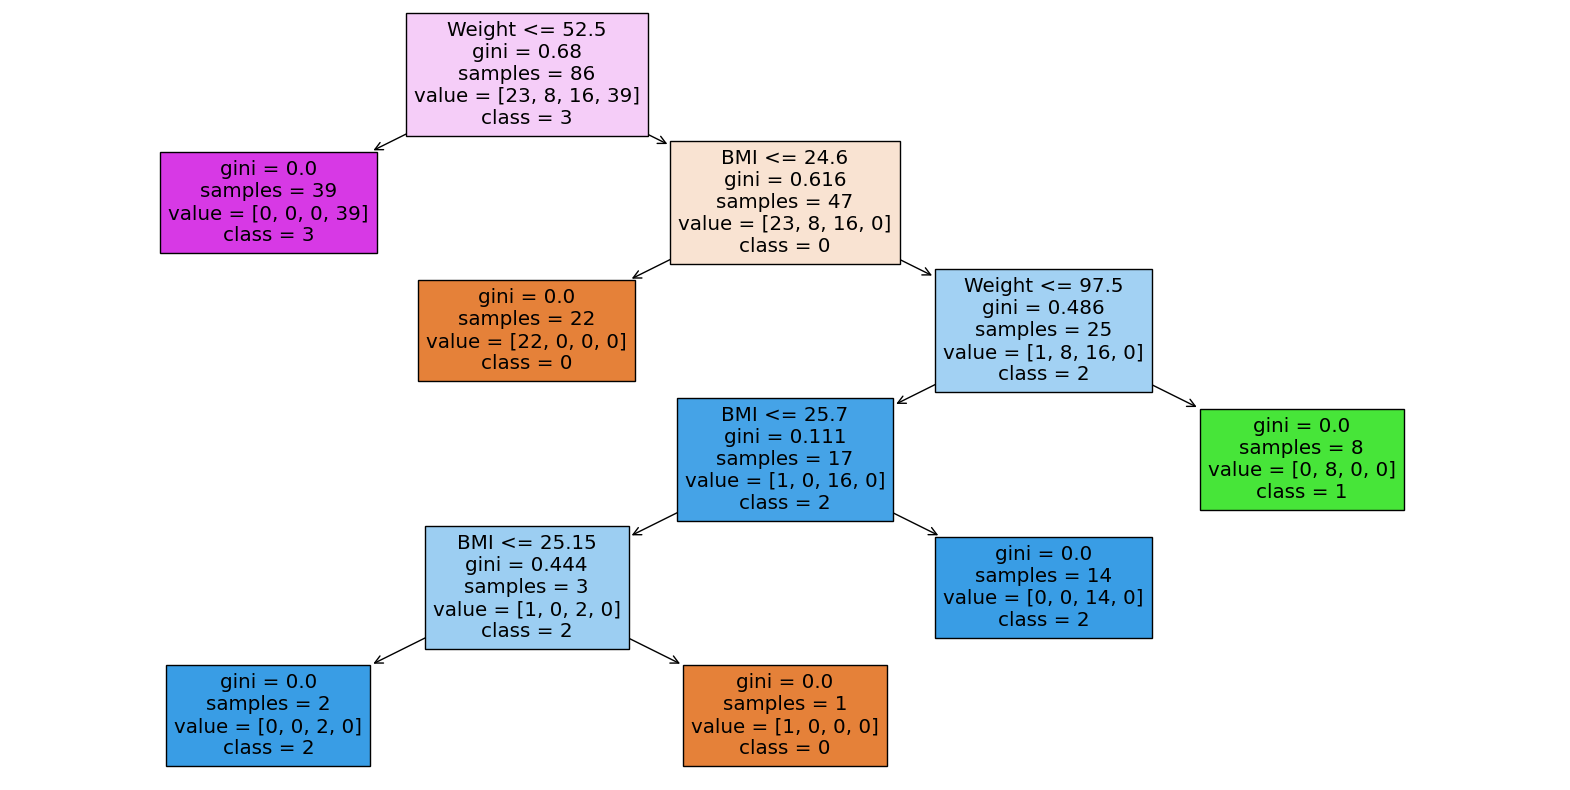

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert class names to strings
class_names = dt_classifier.classes_.astype(str)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=x.columns, class_names=class_names, filled=True)
plt.show()

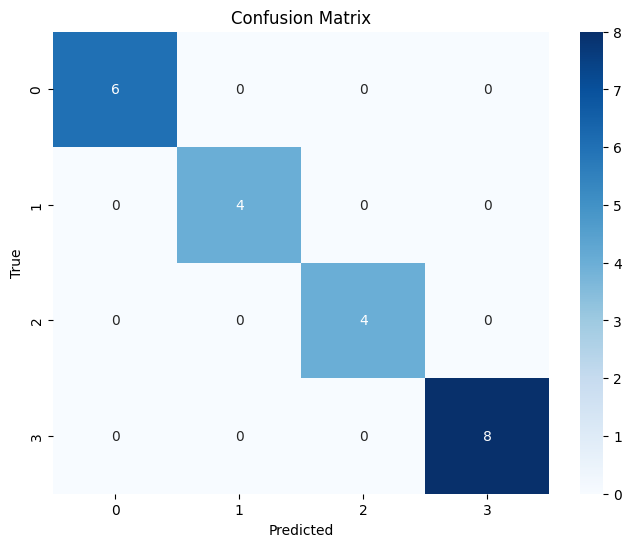

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(dt_classifier, x, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print mean cross-validation score
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.86363636 0.95454545 1.         0.9047619  1.        ]
Mean cross-validation score: 0.9445887445887446


####Mean Cross-Validation Score: The mean cross-validation score is approximately 0.954, indicating that, on average, the decision tree classifier achieved an accuracy of around 95.4% across the different folds. This suggests that the model performs well and consistently on unseen data.

####Cross-Validation Scores: The individual cross-validation scores range from 86.4% to 100%. While most of the folds achieved high accuracy (ranging from 90.5% to 100%), one fold had a slightly lower accuracy of 86.4%. Overall, the model demonstrates good generalization performance across different subsets of the data.

####Conclusion: The cross-validation results support the effectiveness and generalization ability of the decision tree classifier. The model's performance is consistent across multiple folds, indicating its reliability in classifying unseen data. However, it's essential to consider potential variations in performance across different subsets of the data